## 实验：随机梯度下降与动量法

我们已经了解了 **损失函数**、**神经网络梯度** 与 **梯度下降** 以及 **反向传播** 的基本概念。本实验中，我们将继续深入研究优化与深度学习的关系，以及优化在深度学习中的挑战。在一个深度学习问题中，我们通常会预先定义一个 **损失函数**。有了 **损失函数**以后，我们就可以使用优化算法试图将其最小化。在优化中，这样的损失函数通常被称作优化问题的目标函数（objective function）。依据惯例，优化算法通常只考虑最小化目标函数。其实，任何最大化问题都可以很容易地转化为最小化问题，只需令目标函数的相反数为新的目标函数即可。

虽然优化为深度学习提供了最小化 **损失函数** 的方法，但本质上，优化与深度学习的目标是有区别的。由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。而深度学习的目标在于降低泛化误差。为了降低泛化误差，除了使用优化算法降低训练误差以外，还需要注意应对过拟合。在这里，我们只关注优化算法在最小化目标函数上的表现，而不关注模型的泛化误差。

### 实验概要

#### 优化在深度学习中的挑战

优化在深度学习中有很多挑战。下面描述了其中的两个挑战，即局部最小值和鞍点。为了演示更直观，我们导入 Matplotlib 的 3D 绘图库 **mpl_toolkits**，提供一些基本的 3D 绘图（散布，冲浪，线，网格）工具。

<img src="./img/sphx_glr_contourf3d_2_001_13.png" width="40%">

In [1]:
import numpy as np

import matplotlib.pyplot as plt
# 导入3D绘图库
from mpl_toolkits import mplot3d 

# 魔法指令，使Matplotlib图形直接在Jupyter Notebook中显示
%matplotlib inline

##### 局部最小值

对于目标函数 $f(x)$ ，如果 $f(x)$ 在 $x$ 上的值比在 $x$ 邻近的其他点的值更小，那么 $f(x)$ 可能是一个局部最小值（**local minimum**）。如果 $f(x)$ 在 $x$ 上的值是目标函数在整个定义域上的最小值，那么 $f(x)$ 是全局最小值（**global minimum**）。

举个例子，给定函数：

$$
f(x)=x \cdot \cos (\pi x), \quad-1.0 \leq x \leq 2.0
$$

我们可以大致找出该函数的局部最小值和全局最小值的位置。需要注意的是，图中箭头所指示的只是大致位置。

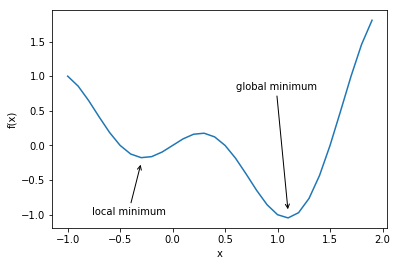

In [2]:
# 定义公式函数：𝑓(𝑥)=𝑥⋅cos(𝜋𝑥)
def f(x):
    return x * np.cos(np.pi * x)

# 设置x取值范围：−1.0≤𝑥≤2.0
x = np.arange(-1.0, 2.0, 0.1) 

# 逗号表示只取返回列表中的第一个元素
fig, = plt.plot(x, f(x))  

# 指定局部最小值
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))

# 指定全局最小值
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))

plt.xlabel('x')
plt.ylabel('f(x)');

从上图可知：深度学习模型的目标函数可能有若干局部最优值。当一个优化问题的数值解在局部最优解附近时，由于目标函数有关解的梯度接近或变成 0，最终迭代求得的数值解可能只令目标函数局部最小化而非全局最小化。

##### 鞍点

刚刚我们提到，梯度接近或变成 0 可能是由于当前解在局部最优解附近造成的。事实上，另一种可能性是当前解在鞍点（**saddle point**）附近。

举个例子，给定函数：

$$
f(x)=x^{3}
$$

我们可以找出该函数的鞍点位置。

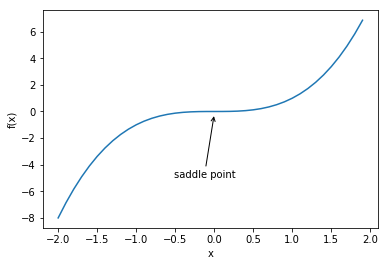

In [3]:
# 设置x取值范围
x = np.arange(-2.0, 2.0, 0.1) 
# 定义公式：𝑓(𝑥)=𝑥^3
fig, = plt.plot(x, x**3) 

fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))

plt.xlabel('x')
plt.ylabel('f(x)');

再举个定义在二维空间的函数的例子，例如：

$$
f(x, y)=x^{2}-y^{2}
$$

我们可以找出该函数的鞍点位置。也许你已经发现了，该函数看起来像一个马鞍，而鞍点恰好是马鞍上可坐区域的中心。

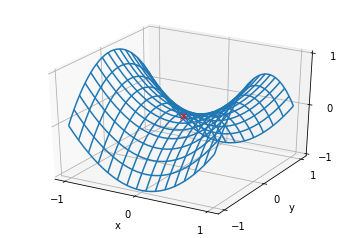

In [4]:
# 使用 np.mgrid函数生成网格型数据
# 这里生成两个二维矩阵x，y；
# 步长为复数31j：指定起始值和终止值之间创建的点数，其中终止值包括端点值
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j] 

# 定义公式：𝑓(𝑥,𝑦)=𝑥^2−𝑦^2
z = x**2 - y**2 

ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y');

在上图的鞍点（**红色的 X**）位置，目标函数在 x 轴方向上是局部最小值，但在 y 轴方向上是局部最大值。

假设一个函数的输入为 k 维向量，输出为标量，那么它的海森矩阵（Hessian matrix）有 k 个特征值。该函数在梯度为 0 的位置上可能是局部最小值、局部最大值或者鞍点：

- 当函数的海森矩阵在梯度为 0 的位置上的特征值全为正时，该函数得到局部最小值。
- 当函数的海森矩阵在梯度为 0 的位置上的特征值全为负时，该函数得到局部最大值。
- 当函数的海森矩阵在梯度为 0 的位置上的特征值有正有负时，该函数得到鞍点。

随机矩阵理论告诉我们，对于一个大的高斯随机矩阵来说，任一特征值是正或者是负的概率都是 0.5。那么，以上第一种情况的概率为 $0.5^{k}$。由于深度学习模型参数通常都是高维的（ k 很大），目标函数的鞍点通常比局部最小值更常见。

#### 概要小结

- 由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。
- 由于深度学习模型参数通常都是高维的，目标函数的鞍点通常比局部最小值更常见。

### 实验目标

在深度学习中，虽然找到目标函数的全局最优解很难，但这并非必要。

我们将在本实验中，逐一介绍深度学习中常用的基础优化算法，它们在很多实际问题中都能够训练出十分有效的深度学习模型。首先，我们将复习梯度下降（Gradient Descent）的工作原理。虽然梯度下降在深度学习中很少被直接使用，但理解梯度的意义以及沿着梯度反方向更新自变量可能降低目标函数值的原因是学习后续优化算法的基础。随后，我们将引出 **随机梯度下降（Stochastic Gradient Descent）**、**小批量随机梯度下降** 和 **动量法**。

### 1. 一维梯度下降

我们先以简单的一维梯度下降为例，解释梯度下降算法可能降低目标函数值的原因。假设连续可导的函数 $f: \mathbb{R} \rightarrow \mathbb{R}$ 的输入和输出都是标量。给定绝对值足够小的数 $\epsilon$，根据泰勒展开公式：

$$
R_{n}(x)=\mathrm{e}^{x}-\left(1+x+\frac{x^{2}}{2 !}+\frac{x^{3}}{3 !}+\cdots+\frac{x^{n}}{n !}\right)
$$

我们得到以下的近似：

$$f(x + \epsilon) \approx f(x) + \epsilon f'(x) .$$

这里 $f'(x)$ 是函数 $f$ 在 $x$ 处的梯度。一维函数的梯度是一个标量，也称 **导数**。

接下来，找到一个常数 $\eta > 0$，使得 $\left|\eta f'(x)\right|$ 足够小，那么可以将 $\epsilon$ 替换为 $-\eta f'(x)$ 并得到：

$$f(x - \eta f'(x)) \approx f(x) - \eta f'(x)^2.$$

如果导数 $f'(x) \neq 0$，那么 $\eta f'(x)^2>0$，所以：

$$f(x - \eta f'(x)) \lesssim f(x).$$

这意味着，如果通过：

$$x \leftarrow x - \eta f'(x)$$

来迭代 $x$，函数 $f(x)$ 的值可能会降低。因此在梯度下降中，我们先选取一个初始值 $x$ 和常数 $\eta > 0$，然后不断通过上式来迭代 $x$，直到达到停止条件，例如 $f'(x)^2$ 的值已足够小或迭代次数已达到某个值。

下面，我们以目标函数 $f(x)=x^2$ 为例，看一看梯度下降是如何工作的。虽然我们知道最小化 $f(x)$ 的解为 $x=0$，这里依然使用这个简单函数来观察 $x$ 是如何被迭代的。使用 $x=10$ 作为初始值，并设 $\eta=0.2$。使用梯度下降对 $x$ 迭代 10 次，可见最终 $x$ 的值较接近最优解。

In [5]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        # f(x) = x * x的导数为f'(x) = 2 * x
        x -= eta * 2 * x  
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


绘制出自变量 $x$ 的迭代轨迹。

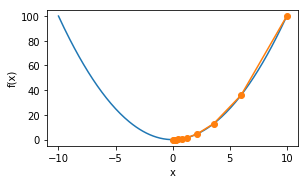

In [6]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    
    plt.rcParams['figure.figsize'] = (4.5, 2.5)
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(res, [x * x for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')

show_trace(res)

### 2. 学习率

上述梯度下降算法中的正数 $\eta$ 通常叫作学习率。这是一个超参数，**需要人工设定**。如果使用过小的学习率，会导致 $x$ 更新缓慢从而需要更多的迭代才能得到较好的解。下面展示使用学习率 $\eta=0.05$ 时自变量 $x$ 的迭代轨迹。可见，同样迭代 10 次后，当学习率过小时，最终 $x$ 的值依然与最优解存在较大偏差。

epoch 10, x: 3.4867844009999995


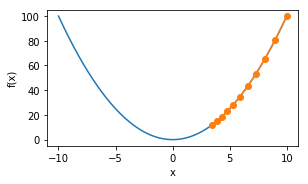

In [7]:
show_trace(gd(0.05))

如果使用过大的学习率，$\left| \eta f'(x)\right |$ 可能会过大从而使前面提到的一阶泰勒展开公式不再成立：这时我们无法保证迭代 $x$ 会降低 $f(x)$ 的值。

举个例子，当设学习率 $\eta=1.1$ 时，可以看到 $x$ 不断越过（overshoot）最优解 $x = 0$ 并逐渐发散。

epoch 10, x: 61.917364224000096


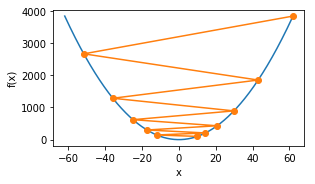

In [8]:
show_trace(gd(1.1))

### 3. 多维梯度下降

在了解了一维梯度下降之后，我们再考虑一种更广义的情况：目标函数的输入为向量，输出为标量。假设目标函数 $f: \mathbb{R}^d \rightarrow \mathbb{R}$ 的输入是一个 $d$ 维向量 $\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数 $f(\boldsymbol{x})$ 有关 $\boldsymbol{x}$ 的梯度是一个由 $d$ 个偏导数组成的向量：

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$

为表示简洁，我们用 $\nabla f(\boldsymbol{x})$ 代替 $\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$。梯度中每个偏导数元素 $\partial f(\boldsymbol{x})/\partial x_i$ 代表着 $f$ 在 $\boldsymbol{x}$ 有关输入 $x_i$ 的变化率。为了测量 $f$ 沿着单位向量 $\boldsymbol{u}$（即 $|\boldsymbol{u}|=1$ ）方向上的变化率，在多元微积分中，我们定义 $f$ 在 $\boldsymbol{x}$ 上沿着 $\boldsymbol{u}$ 方向的方向导数为

$$\text{D}{\boldsymbol{u}} f(\boldsymbol{x}) = \lim{h \rightarrow 0} \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

依据方向导数性质，以上方向导数可以改写为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

方向导数 $\text{D}{\boldsymbol{u}} f(\boldsymbol{x})$ 给出了 $f$ 在 $\boldsymbol{x}$ 上沿着所有可能方向的变化率。为了最小化 $f$，我们希望找到 $f$ 能被降低最快的方向。因此，我们可以通过单位向量 $\boldsymbol{u}$ 来最小化方向导数 $\text{D}{\boldsymbol{u}} f(\boldsymbol{x})$。

由于 $\text{D}{\boldsymbol{u}} f(\boldsymbol{x}) = |\nabla f(\boldsymbol{x})| \cdot |\boldsymbol{u}| \cdot \text{cos} (\theta) = |\nabla f(\boldsymbol{x})| \cdot \text{cos} (\theta)$， 其中 $\theta$ 为梯度 $\nabla f(\boldsymbol{x})$ 和单位向量 $\boldsymbol{u}$ 之间的夹角，当 $\theta = \pi$ 时，$\text{cos}(\theta)$ 取得最小值 $-1$。因此，当 $\boldsymbol{u}$ 在梯度方向 $\nabla f(\boldsymbol{x})$ 的相反方向时，方向导数 $\text{D}{\boldsymbol{u}} f(\boldsymbol{x})$ 被最小化。因此，我们可能通过梯度下降算法来不断降低目标函数 $f$ 的值：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

同样，其中 $\eta$（取正数）称作 **学习率**。

下面我们构造一个输入为二维向量 $\boldsymbol{x} = [x_1, x_2]^\top$ 和输出为标量的目标函数 $f(\boldsymbol{x})=x_1^2+2x_2^2$。那么，梯度 $\nabla f(\boldsymbol{x}) = [2x_1, 4x_2]^\top$。我们将观察梯度下降从初始位置 $[-5,-2]$ 开始对自变量 $\boldsymbol{x}$ 的迭代轨迹。我们先定义两个辅助函数，第一个函数使用给定的自变量更新函数，从初始位置 $[-5,-2]$ 开始迭代自变量 $\boldsymbol{x}$ 共 20 次，第二个函数对自变量 $\boldsymbol{x}$ 的迭代轨迹进行可视化。

In [9]:
# 该函数在后面将继续被调用
def train_2d(trainer):  
    # s1和s2是自变量状态，本章后续几节会使用
    x1, x2, s1, s2 = -5, -2, 0, 0  
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

# 该函数在后面将继续被调用
def show_trace_2d(f, results): 
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

然后，观察学习率为 $0.1$ 时自变量的迭代轨迹。使用梯度下降对自变量 $\boldsymbol{x}$ 迭代 20 次后，可见最终 $\boldsymbol{x}$ 的值较接近最优解 $[0,0]$。

In [10]:
# 设置学习率
eta = 0.1

# 目标函数
def f_2d(x1, x2):  
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1 -0.057646, x2 -0.000073


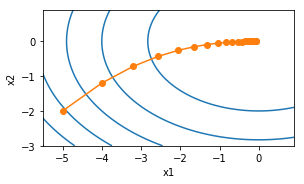

In [11]:
show_trace_2d(f_2d, train_2d(gd_2d))

### 4. 随机梯度下降

在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设 $f_i(\boldsymbol{x})$ 是有关索引为 $i$ 的训练数据样本的损失函数， $n$ 是训练数据样本数，$\boldsymbol{x}$ 是模型的参数向量，那么目标函数定义为

$$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$

目标函数在 $\boldsymbol{x}$ 处的梯度计算为

$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$

如果使用梯度下降，每次自变量迭代的计算开销为 $\mathcal{O}(n)$，它随着 $n$ 线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。

**随机梯度下降（stochastic gradient descent，SGD）** 减少了每次迭代的计算开销。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引 $i\in{1,\ldots,n}$，并计算梯度$\nabla f_i(\boldsymbol{x})$ 来迭代 $\boldsymbol{x}$：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$

这里 $\eta$ 同样是学习率。可以看到，每次迭代的计算开销从梯度下降的 $\mathcal{O}(n)$ 降到了常数 $\mathcal{O}(1)$。值得强调的是，随机梯度 $\nabla f_i(\boldsymbol{x})$ 是对梯度 $\nabla f(\boldsymbol{x})$ 的无偏估计：

$$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

这意味着，平均来说，随机梯度是对梯度的一个良好的估计。

下面我们通过在梯度中添加均值为 0 的随机噪声来模拟随机梯度下降，以此来比较它与梯度下降的区别。

In [12]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

epoch 20, x1 -0.121884, x2 0.099277


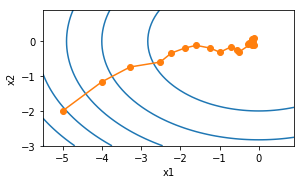

In [13]:
show_trace_2d(f_2d, train_2d(sgd_2d))

可以看到，随机梯度下降中自变量的迭代轨迹相对于梯度下降中的来说更为曲折。这是由于实验所添加的噪声使模拟的随机梯度的准确度下降。在实际中，这些噪声通常指训练数据集中的无意义的干扰。

#### 小结
- 使用适当的学习率，沿着梯度反方向更新自变量可能降低目标函数值。梯度下降重复这一更新过程直到得到满足要求的解。
- 学习率过大或过小都有问题。一个合适的学习率通常是需要通过多次实验找到的。
- 当训练数据集的样本较多时，梯度下降每次迭代的计算开销较大，因而随机梯度下降通常更受青睐。

### 5. 小批量随机梯度下降

在每一次迭代中，梯度下降使用整个训练数据集来计算梯度，因此它有时也被称为 **批量梯度下降（batch gradient descent）**。而随机梯度下降在每次迭代中只随机采样一个样本来计算梯度。正如我们在前几章中所看到的，我们还可以在每轮迭代中随机均匀采样多个样本来组成一个小批量，然后使用这个小批量来计算梯度。下面就来描述 **小批量随机梯度下降**。

设目标函数 $f(\boldsymbol{x}): \mathbb{R}^{d} \rightarrow \mathbb{R}$。在迭代开始前的时间步设为 0。该时间步的自变量记为 $\boldsymbol{x}_{0} \in \mathbb{R}^{d}$，通常由随机初始化得到。在接下来的每一个时间步 $t>0$ 中，小批量随机梯度下降随机均匀采样一个由训练数据样本索引组成的小批量 $\mathcal{B}_{t}$。我们可以通过 **重复采样（sampling with replacement）** 或者 **不重复采样（sampling without replacement）** 得到一个小批量中的各个样本。前者允许同一个小批量中出现重复的样本，后者则不允许如此，且更常见。对于这两者间的任一种方式，都可以使用：

$$
\boldsymbol{g}_{t} \leftarrow \nabla f_{\mathcal{B}_{t}}\left(\boldsymbol{x}_{t-1}\right)=\frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_{t}} \nabla f_{i}\left(\boldsymbol{x}_{t-1}\right)
$$

来计算时间步 $t$ 的小批量 $\mathcal{B}_{t}$ 上目标函数位于 $\mathcal{x}_{t-1}$ 处的梯度 $\mathcal{g}_{t}$ 。这里 $|\mathcal{B}|$ 代表批量大小，即小批量中样本的个数，是一个超参数。同随机梯度一样，重复采样所得的小批量随机梯度 $\mathcal{x}_{t-1}$ 也是对梯度 $\nabla f\left(x_{t-1}\right)$ 的无偏估计。给定学习率 $\eta_{t}$（取正数），小批量随机梯度下降对自变量的迭代如下：

$$
\boldsymbol{x}_{t} \leftarrow \boldsymbol{x}_{t-1}-\eta_{t} \boldsymbol{g}_{t} .
$$

基于随机采样得到的梯度的方差在迭代过程中无法减小，因此在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减，例如 $\eta_{t}=\eta t^{\alpha}$ （通常 $α=−1$ 或者 $−0.5$ ）、$\eta_{t}=\eta \alpha^{t}$ （如 $α=0.95$ ）或者每迭代若干次后将学习率衰减一次。如此一来，学习率和（小批量）随机梯度乘积的方差会减小。而梯度下降在迭代过程中一直使用目标函数的真实梯度，无须自我衰减学习率。

小批量随机梯度下降中每次迭代的计算开销为 $\mathcal{O}(|\mathcal{B}|)$ 。当批量大小为 1 时，该算法即随机梯度下降；当批量大小等于训练数据样本数时，该算法即梯度下降。当批量较小时，每次迭代中使用的样本少，这会导致并行处理和内存使用效率变低。这使得在计算同样数目样本的情况下比使用更大批量时所花时间更多。当批量较大时，每个小批量梯度里可能含有更多的冗余信息。为了得到较好的解，批量较大时比批量较小时需要计算的样本数目可能更多，例如增大迭代周期数。

In [14]:
import numpy as np

# 构造训练数据集
x_train = np.array([[2, 0., 3], [3, 1., 3], [0, 2., 3], [4, 3., 2], [1, 4., 4]])
m = len(x_train)

x0 = np.full((m, 1), 1)

# 构造一个每个数据第一维特征都是1的矩阵
input_data = np.hstack([x0, x_train])
m, n = input_data.shape
theta1 = np.array([[2 ,3, 4]]).T

# 构建标签数据集，后面的np.random.randn是将数据加一点噪声，以便模拟数据集。
#y_train = (input_data.dot(np.array([1, 2, 3, 4]).T)).T
y_train = x_train.dot(theta1) + np.array([[2],[2],[2],[2],[2]]) 

# 设置两个终止条件
loop_max = 1000000
epsilon = 1e-5

# 初始theta
# 设置随机种子
np.random.seed(0)  
# 随机取一个1维列向量初始化theta
theta = np.random.randn(n,1)   

# 初始化步长/学习率
alpha = 0.00001

# 初始化误差，每个维度的theta都应该有一个误差，所以误差是一个4维。
# 列向量
error = np.zeros((n, 1))  

# 初始化偏导数
diff = np.zeros((input_data.shape[1], 1 ))

# 初始化循环次数
count = 0

# 设置小批量的样本数
minibatch_size= 2 

while count < loop_max:
    count += 1
    sum_m = np.zeros((n, 1))

    for i in range(1, m, minibatch_size):
        for j in range(i - 1, i + minibatch_size - 1, 1):
            # 计算每个维度的theta
            diff[j] = (input_data[i].dot(theta)-y_train[i])*input_data[i, j]
        
        # 求每个维度的梯度的累加和
        sum_m = sum_m + diff
    
    # 利用这个累加和更新梯度    
    theta = theta - alpha * (1.0 / minibatch_size)* sum_m
    
    # else中将前一个theta赋值给error,theta - error便表示前后两个梯度的变化，当梯度
    #变化很小（在接收的范围内）时，便停止迭代。
    if np.linalg.norm(theta - error) < epsilon:
        break
    else:
        error = theta
    
print(theta)

[[2.52046439]
 [2.66939334]
 [2.50101719]
 [3.255746  ]]


#### 小结

- 小批量随机梯度每次随机均匀采样一个小批量的训练样本来计算梯度。
- 在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减。
- 通常，小批量随机梯度在每个迭代周期的耗时介于梯度下降和随机梯度下降的耗时之间。

### 6. 动量法 (Momentum)

目标函数有关自变量的梯度代表了目标函数在自变量当前位置下降最快的方向。因此，梯度下降也叫作 **最陡下降（steepest descent）**。在每次迭代中，梯度下降根据自变量当前位置，沿着当前位置的梯度更新自变量。然而，如果自变量的迭代方向仅仅取决于自变量当前位置，这可能会带来一些问题。

#### 6.1 梯度下降的问题

让我们考虑一个输入和输出分别为二维向量 $\boldsymbol{x} = [x_1, x_2]^\top$ 和标量的目标函数 $f(\boldsymbol{x})=0.1x_1^2+2x_2^2$。与之前提及的不同，这里将 $x_1^2$ 系数从 $1$ 减小到了 $0.1$。下面实现基于这个目标函数的梯度下降，并演示使用学习率为 $0.4$ 时自变量的迭代轨迹。

In [15]:
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1 -0.943467, x2 -0.000073


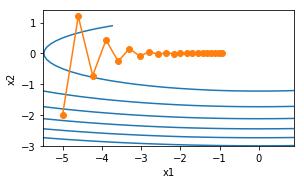

In [16]:
show_trace_2d(f_2d, train_2d(gd_2d))

可以看到，同一位置上，目标函数在竖直方向（$x_2$ 轴方向）比在水平方向（$x_1$ 轴方向）的斜率的绝对值更大。因此，给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。那么，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。然而，这会造成自变量在水平方向上朝最优解移动变慢。

下面我们试着将学习率调得稍大一点，此时自变量在竖直方向不断越过最优解并逐渐发散。

epoch 20, x1 -0.387814, x2 -1673.365109


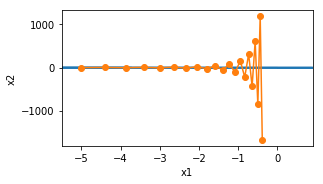

In [17]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

#### 6.2 动量法

动量法的提出是为了解决梯度下降的上述问题。由于小批量随机梯度下降比梯度下降更为广义，本章后续讨论将沿用『小批量随机梯度下降』一节中时间步 $t$ 的小批量随机梯度 $\boldsymbol{g}_t$ 的定义。设时间步 $t$ 的自变量为 $\boldsymbol{x}_t$，学习率为 $\eta_t$。在时间步 $0$，动量法创建速度变量 $\boldsymbol{v}_0$，并将其元素初始化成 0。在时间步 $t>0$，动量法对每次迭代的步骤做如下修改：

$$
\begin{array}{l}
\boldsymbol{v}_{t} \leftarrow \gamma \boldsymbol{v}_{t-1}+\eta_{t} \boldsymbol{g}_{t}, \\
\boldsymbol{x}_{t} \leftarrow \boldsymbol{x}_{t-1}-\boldsymbol{v}_{t}
\end{array}
$$

其中，动量超参数 $\gamma$ 满足 $0 \leq \gamma < 1$。当 $\gamma=0$ 时，动量法等价于小批量随机梯度下降。从实验中观察梯度下降在使用动量法后的迭代轨迹。

In [18]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

epoch 20, x1 -0.062843, x2 0.001202


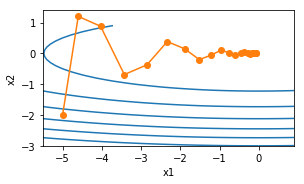

In [19]:
eta, gamma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

可以看到使用较小的学习率 $\eta=0.4$ 和动量超参数 $\gamma=0.5$ 时，动量法在竖直方向上的移动更加平滑，且在水平方向上更快逼近最优解。下面使用较大的学习率 $\eta=0.6$，此时自变量也不再发散。

epoch 20, x1 0.007188, x2 0.002553


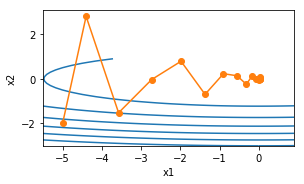

In [20]:
eta = 0.6
show_trace_2d(f_2d, train_2d(momentum_2d))

#### 小结
- 动量法使用了指数加权移动平均的思想。它将过去时间步的梯度做了加权平均，且权重按时间步指数衰减。
- 动量法使得相邻时间步的自变量更新在方向上更加一致。

### 实验小结

在本实验中， 你复习了梯度下降基本原理，并且实现了简单的 **随机梯度下降（Stochastic Gradient Descent）** 、**小批量随机梯度下降** 和 **动量法**。你了解到：由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。另外，由于深度学习模型参数通常都是高维的，目标函数的鞍点通常比局部最小值更常见。对于 **随机梯度下降（Stochastic Gradient Descent）** ，使用适当的学习率，沿着梯度反方向更新自变量可能降低目标函数值。梯度下降重复这一更新过程直到得到满足要求的解。学习率过大或过小都有问题。一个合适的学习率通常是需要通过多次实验找到的。当训练数据集的样本较多时，梯度下降每次迭代的计算开销较大，因而随机梯度下降通常更受青睐。在 **小批量随机梯度下降** 中，小批量随机梯度每次随机均匀采样一个小批量的训练样本来计算梯度。在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减。通常，小批量随机梯度在每个迭代周期的耗时介于梯度下降和随机梯度下降的耗时之间。最后，对于 **动量法**，它使用了指数加权移动平均的思想。它将过去时间步的梯度做了加权平均，且权重按时间步指数衰减。动量法使得相邻时间步的自变量更新在方向上更加一致。